<a href="https://colab.research.google.com/github/LauraCorredor7/Finanzas-Computacionales/blob/main/Taller_1_LauraCorredor_Santiago_Bohorquez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Presentado por:
Laura Corredor -
Santiago Bohorquez

In [ ]:
%pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab as py

**1. Descargue las series de tiempo de precios (ajustados) mensuales para el periodo Ene2010 a Dic-2021 de las siguientes 4 acciones: MCD, GE, IBM, T. Con esta información: **

In [ ]:
def get_prices(symbols,start,end,interval):
  _data = yf.download(tickers=symbols,start=start,end=end,interval=interval,progress=False)
  _prices = _data['Adj Close']
  return _prices


In [ ]:
prices = get_prices(['MCD','GE','IBM','T'],start='2010-01-01',end='2021-12-01',interval='1mo').dropna()
prices

,GE,IBM,MCD,T
Date,,,,
2010-01-01,91.124458,76.034470,43.710957,7.295421
2010-02-01,91.011185,78.997841,44.705177,7.279532
2010-03-01,103.782204,80.031326,47.111687,7.581747
2010-04-01,107.545761,80.499352,49.844315,7.646298
2010-05-01,93.232948,78.165543,47.217613,7.283844
...,...,...,...,...
2021-07-01,103.212868,126.753990,237.411972,19.095331
2021-08-01,105.016113,126.196457,232.276596,19.121511
2021-09-01,102.645004,126.366844,237.139893,18.835596


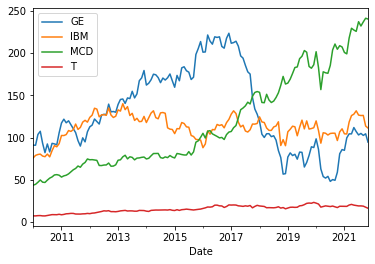

In [ ]:
prices.plot()

**a. Calcule los retornos logarítmicos.**

In [ ]:
retornos=np.log(prices/prices.shift()).dropna()
retornos

,GE,IBM,MCD,T
Date,,,,
2010-02-01,-0.001244,0.038234,0.022491,-0.002180
2010-03-01,0.131312,0.012998,0.052432,0.040677
2010-04-01,0.035622,0.005831,0.056383,0.008478
2010-05-01,-0.142815,-0.029420,-0.054137,-0.048563
2010-06-01,-0.125612,-0.009200,-0.006700,-0.004537
...,...,...,...,...
2021-07-01,-0.037866,-0.039163,0.049493,-0.025692
2021-08-01,0.017320,-0.004408,-0.021868,0.001370
2021-09-01,-0.022837,0.001349,0.020721,-0.015065


**b. Calcule las estadísticas descriptivas (media, mediana, desv. estándar, curtosis, simetría)
para cada uno de ellos. Presente los estadísticos en una tabla para todos los activos.** 

In [ ]:
estadistico = retornos.describe()
estadistico

,GE,IBM,MCD,T
count,142.000000,142.000000,142.000000,142.000000
mean,0.000272,0.002690,0.012010,0.005675
std,0.087243,0.059556,0.042036,0.048122
min,-0.315013,-0.270005,-0.154431,-0.189159
25%,-0.041835,-0.025182,-0.009284,-0.019824
50%,-0.001587,0.002331,0.011048,0.004203
75%,0.042459,0.042199,0.039391,0.042089
max,0.316246,0.167670,0.130368,0.098671


In [ ]:
estadistico1 = estadistico.loc[["mean","std","count"]]
estadistico1

,GE,IBM,MCD,T
mean,0.000272,0.002690,0.012010,0.005675
std,0.087243,0.059556,0.042036,0.048122
count,142.000000,142.000000,142.000000,142.000000


In [ ]:
curtosis = pd.DataFrame({'curtosis':retornos.kurt()})
curtosis.T
#curtosis = retornos.kurt()
#curtosis.T

,GE,IBM,MCD,T
curtosis,2.999658,2.79978,1.688368,1.591506


In [ ]:
simetria=pd.DataFrame({'simetria':retornos.skew()})
simetria.T

,GE,IBM,MCD,T
simetria,-0.089401,-0.643367,-0.442057,-0.711106


In [ ]:
#DataFrame
estadistico1.append(curtosis.T).append(simetria.T)

,GE,IBM,MCD,T
mean,0.000272,0.002690,0.012010,0.005675
std,0.087243,0.059556,0.042036,0.048122
count,142.000000,142.000000,142.000000,142.000000
curtosis,2.999658,2.799780,1.688368,1.591506
simetria,-0.089401,-0.643367,-0.442057,-0.711106


# Analisis
La media de los retornos donde podemos decir que Mc Donalds tiene en promedio el retorno más alto y General Electric tiene el retorno más bajo.
Los datos están inclunados más hacia la izquierda y los datos más concentrados están GE según la curtosis y contamos con 142 datos mensuales de cada empresa. 


**c. Presente en un Data Frame los retornos esperados y las volatilidades anualizadas** 

In [ ]:
sigma1 = pd.DataFrame({"sigma":retornos.std()*np.sqrt(12)})
sigma1.T

,GE,IBM,MCD,T
sigma,0.302219,0.206308,0.145616,0.166701


In [ ]:
mean1 = pd.DataFrame({"mean":retornos.mean()*12})
mean1.T

,GE,IBM,MCD,T
mean,0.00326,0.032285,0.14412,0.068104


In [ ]:
#DataFrame
estadistico2=pd.concat([sigma1.T,mean1.T])
estadistico2

,GE,IBM,MCD,T
sigma,0.302219,0.206308,0.145616,0.166701
mean,0.003260,0.032285,0.144120,0.068104


# Analisis
Los retornos esperados son los que se proyectan de una acción, entonces según la tabla los 

**d. Calcule la matriz de correlaciones de Pearson y de Sperman **

In [ ]:
# Matriz de Pearson
retornos.corr(method="pearson")

,GE,IBM,MCD,T
GE,1.000000,0.371990,0.154432,0.350170
IBM,0.371990,1.000000,0.299540,0.399547
MCD,0.154432,0.299540,1.000000,0.325227
T,0.350170,0.399547,0.325227,1.000000


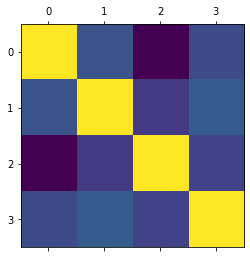

In [ ]:
plt.matshow(retornos.corr())

# Análisis
La correlación en general entre las variables es baja, es positiva, siendo la más alta IBM y T. Esto quiere decir, que su comportamiento tiende a ser diferente para todas las acciones.

In [ ]:
#SPERMAN

In [ ]:
sperman = retornos.corr(method="spearman")
sperman

,GE,IBM,MCD,T
GE,1.000000,0.343396,0.091615,0.312855
IBM,0.343396,1.000000,0.260223,0.358745
MCD,0.091615,0.260223,1.000000,0.299497
T,0.312855,0.358745,0.299497,1.000000


In [ ]:
def display_correlation(df):
    r = df.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)

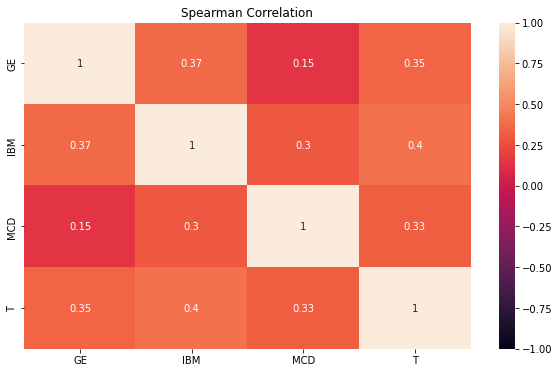

In [ ]:
r_simple=display_correlation(retornos)

# Análisis
Los activos más correlacionados son IBM y GE, aunque tienen una correlación baja, es positiva, entonces el incremento de uno no afecta al otro, al no estar muy correlacionadas pues su comportamiento es diferente.

d. Grafique el histograma de frecuencia de los retornos para dos de las cuatro acciones.

In [ ]:
retornos1 = np.log(prices['GE']/prices['GE'].shift()).dropna()
retornos2 = np.log(prices['IBM']/prices['IBM'].shift()).dropna()

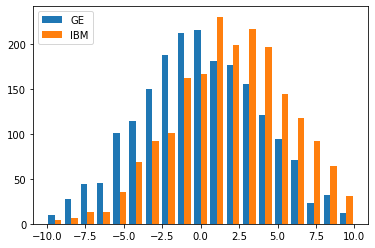

In [ ]:
GE = np.random.normal(0, 4, 2000)
IBM = np.random.normal(2, 4, 2000)

bins = np.linspace(-10, 10, 20)

plt.hist([GE, IBM], bins, label=['GE', 'IBM'])
plt.legend(loc='upper left')
plt.show()

# Analisis
En la gráfica se ve que IBM tiene un retorno más alto que GE, tienen tendencias diferentes.

e. Implemente las pruebas de normalidad de Kolmogorov-Smirnov para todos los activos.
Consolide los resultados en un Data Frame para todos.

In [ ]:
 # Prueba de Kolmogorov-Smirnov
 Kolmogorov=pd.DataFrame({"Kolmo_GE":stats.kstest(retornos["GE"],'norm')}).rename({0:"statistic",1:"p_value"}).T
 Kolmogorov

,statistic,p_value
Kolmo_GE,0.415982,6.375005e-23


In [ ]:
 Kolmogorov1=pd.DataFrame({"Kolmo_IBM":stats.kstest(retornos["IBM"],'norm')}).rename({0:"statistic",1:"p_value"}).T
 Kolmogorov1

,statistic,p_value
Kolmo_IBM,0.437118,3.332561e-25


In [ ]:
 Kolmogorov2=pd.DataFrame({"Kolmo_MCD":stats.kstest(retornos["MCD"],'norm')}).rename({0:"statistic",1:"p_value"}).T
 Kolmogorov2
 

,statistic,p_value
Kolmo_MCD,0.454281,2.718712e-27


In [ ]:
 Kolmogorov3=pd.DataFrame({"Kolmo_T":stats.kstest(retornos["T"],'norm')}).rename({0:"statistic",1:"p_value"}).T
 Kolmogorov3

,statistic,p_value
Kolmo_T,0.4607,4.243395e-28


In [ ]:
#DataFrame
estadistico3=pd.concat([Kolmogorov,Kolmogorov1,Kolmogorov2,Kolmogorov3])
estadistico3

,statistic,p_value
Kolmo_GE,0.415884,9.379785e-23
Kolmo_IBM,0.437118,3.332561e-25
Kolmo_MCD,0.454281,2.718712e-27
Kolmo_T,0.460700,4.243395e-28


# Analisis
Nos dice que el p-value por ser menos a 0.05 hace que la hipotesis de rechace quiere decir que el supuesto de normalidad se rechaza.


2. Con la misma información del punto 1:


a. Calcule la volatilidad mensual y anualizada de las series de retornos usando las medidas
de: i) desviación estándar, ii) Parkinson, iii) Garman-Klass y, iv) volatilidad ponderada
exponencial (EWMA) con una lambda de 0.94. Presente los resultados en un Data Frame


In [ ]:
#PUNTO 2
activo = ['GE','MCD','IBM','T']
precios = yf.download(activo,start="2010-01-01",end="2021-12-31",interval="1mo").dropna()
precios_adj = precios.loc[:,"Adj Close"]
precios

[*********************100%***********************]  4 of 4 completed


Adj Close                                          Close  \
                    GE         IBM         MCD          T          GE   
Date                                                                    
2010-01-01   91.124519   76.034500   43.710968   7.295421  123.692307   
2010-02-01   91.011169   78.997849   44.705196   7.279534  123.538460   
2010-03-01  103.782227   80.031349   47.111687   7.581745  140.000000   
2010-04-01  107.545784   80.499367   49.844334   7.646299  145.076920   
2010-05-01   93.232910   78.165504   47.217594   7.283846  125.769234   
...                ...         ...         ...        ...         ...   
2021-08-01  105.016113  126.196457  232.276596  19.121511  105.410004   
2021-09-01  102.644997  126.366844  237.139893  18.835596  103.029999   
2021-10-01  104.559380  113.787468  241.506790  17.615223  104.870003   
2021-11-01   94.708633  111.410393  240.572433  16.332380   94.989998   
2021-12-01   94.190178  128.862717  265.117676  17.598623   94.470001   

                                                     High              ...  \
                   IBM         MCD          T          GE         IBM  ...   
Date                                                                   ...   
2010-01-01  117.007645   62.430000  19.154079  130.153839  128.346085  ...   
2010-02-01  121.567879   63.849998  18.738670  131.000000  122.629066  ...   
2010-03-01  122.609940   66.720001  19.516617  145.692307  124.980881  ...   
2010-04-01  123.326958   70.589996  19.682779  151.538467  126.462715  ...   
2010-05-01  119.751434   66.870003  18.353474  148.769226  127.246651  ...   
...                ...         ...        ...         ...         ...  ...   
2021-08-01  134.168259  237.460007  20.709970  107.230003  138.336517  ...   
2021-09-01  132.820267  241.110001  20.400303  107.360001  134.388138  ...   
2021-10-01  119.598473  245.550003  19.078550  110.970001  139.579346  ...   
2021-11-01  117.099998  244.600006  17.243202  116.169998  124.779999  ...   
2021-12-01  133.660004  268.070007  18.580059   98.940002  134.990005  ...   

                   Low                   Open                          \
                   MCD          T          GE         IBM         MCD   
Date                                                                    
2010-01-01   61.060001  18.927492  117.076920  125.411087   62.630001   
2010-02-01   62.540001  18.587612  124.615387  117.810707   62.830002   
2010-03-01   63.250000  18.663141  123.846153  121.892921   63.980000   
2010-04-01   67.059998  19.244713  140.538467  123.279160   67.059998   
2010-05-01   65.550003  17.960726  145.923080  123.699806   70.879997   
...                ...        ...         ...         ...         ...   
2021-08-01  233.050003  20.302114  104.480003  135.229446  244.240005   
2021-09-01  235.949997  20.347431  105.360001  133.824097  237.880005   
2021-10-01  236.139999  18.889729  104.180000  134.799240  243.070007   
2021-11-01  243.949997  17.031721  105.760002  119.550667  245.800003   
2021-12-01  244.110001  16.631420   96.550003  118.250000  245.759995   

                            Volume                                          
                    T           GE          IBM          MCD             T  
Date                                                                        
2010-01-01  21.457705  208407550.0  163291687.0  158366700.0  9.665184e+08  
2010-02-01  19.388218  183090323.0  118418914.0  150643900.0  7.664459e+08  
2010-03-01  18.814199  270393890.0  146437175.0  153461200.0  7.816918e+08  
2010-04-01  19.675226  210661724.0  153162014.0  135971400.0  8.485327e+08  
2010-05-01  19.818731  267881367.0  197112633.0  185467000.0  9.881233e+08  
...               ...          ...          ...          ...           ...  
2021-08-01  21.329306  202482000.0   72891244.0   45210000.0  7.898068e+08  
2021-09-01  20.725077  211575700.0   80160627.0   55922700.0  9.844140e+08  
2021-10-01  20.498489  1371

In [ ]:
#RETORNOS  anuales
retornos_1= np.log(precios_adj/precios_adj.shift(1)).dropna()
sigma_d = retornos_1.std()
mean_d=retornos_1.mean()
mean_d
sigma_1=sigma_d*np.sqrt(252)
sigma_1

GE     1.380076
IBM    0.960981
MCD    0.674479
T      0.766717
dtype: float64

In [ ]:
retornos_anual=pd.DataFrame({"retornos_anual":sigma_d*np.sqrt(252)})
retornos_anual.T

,GE,IBM,MCD,T
retornos_anual,1.380076,0.960981,0.674479,0.766717


In [ ]:
#RETORNOS  mensuales
retornos_2= np.log(precios_adj/precios_adj.shift(1)).dropna()
sigma_d = retornos_2.std()
mean_d=retornos_2.mean()
mean_d
sigma_d*np.sqrt(1)

GE     0.086937
IBM    0.060536
MCD    0.042488
T      0.048299
dtype: float64

In [ ]:
retornos_mensual=pd.DataFrame({"retornos_mensual":sigma_d*np.sqrt(1)})
retornos_mensual.T

,GE,IBM,MCD,T
retornos_mensual,0.086937,0.060536,0.042488,0.048299


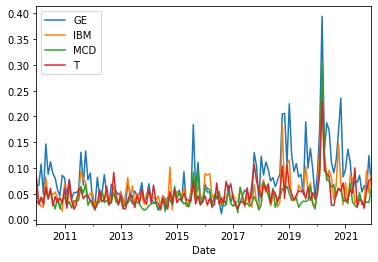

In [ ]:
#parkinson
lnHL = np.log(precios["High"]/precios["Low"]).dropna()
sigmaPark_d = ((1/(4*np.log(2)))*lnHL**2)**0.5
sigmaPark_d.plot()

In [ ]:
from numpy.ma.core import sqrt
# Volatilidad anulizada de Parkinson
sigmaPark=sigmaPark_d.mean()*np.sqrt(12)
sigmaPark

GE     0.267589
IBM    0.187842
MCD    0.147625
T      0.167825
dtype: float64

In [ ]:
sigmaPark1=pd.DataFrame({"parkinson_anual":sigmaPark_d.mean()*np.sqrt(12)})
sigmaPark1.T

,GE,IBM,MCD,T
parkinson_anual,0.267589,0.187842,0.147625,0.167825


In [ ]:
# Volatilidad mensual de Parkinson
sigmaPark=sigmaPark_d.mean()*np.sqrt(1)
sigmaPark

GE     0.077246
IBM    0.054225
MCD    0.042616
T      0.048447
dtype: float64

In [ ]:
sigmaPark2=pd.DataFrame({"parkinson_mensual":sigmaPark_d.mean()*np.sqrt(1)})
sigmaPark2.T

,GE,IBM,MCD,T
parkinson_mensual,0.077246,0.054225,0.042616,0.048447


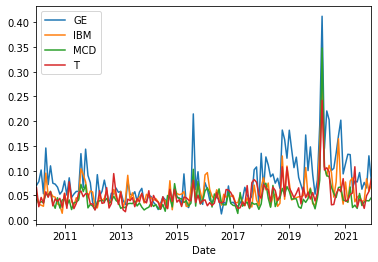

In [ ]:
#medida de garman-klass
lnHL = np.log(precios["High"]/precios["Low"]).dropna()
lnCO = np.log(precios["Close"]/precios["Open"]).dropna()
sigmaGK_d = (0.5*lnHL**2-(2*np.log(2)-1)*lnCO**2)**0.5
sigmaGK_d.plot()

In [ ]:
# Volatilidad anulizada de Garman-Klass
sigmaGK=sigmaGK_d.mean()*np.sqrt(12)
sigmaGK

GE     0.274446
IBM    0.191380
MCD    0.152538
T      0.172823
dtype: float64

In [ ]:
sigmaGK2=pd.DataFrame({"Garman_anual":sigmaGK_d.mean()*np.sqrt(12)})
sigmaGK2.T

,GE,IBM,MCD,T
Garman_anual,0.274446,0.19138,0.152538,0.172823


In [ ]:
# Volatilidad mensual de Garman-Klass
sigmaGK=sigmaGK_d.mean()*np.sqrt(1)
sigmaGK

GE     0.079226
IBM    0.055247
MCD    0.044034
T      0.049890
dtype: float64

In [ ]:
sigmaGK3=pd.DataFrame({"Garman_mensual":sigmaGK_d.mean()*np.sqrt(1)})
sigmaGK3.T

,GE,IBM,MCD,T
Garman_mensual,0.079226,0.055247,0.044034,0.04989


In [ ]:
#VOLATILIDAD EWMA

In [ ]:
retornos=np.log(precios_adj/precios_adj.shift()).dropna()


In [ ]:
# Definir la función
def EWMAvol(retornos,Lambda):
  m = len(retornos) 
  b = np.arange(m-1,-1,-1) # secuencia decreciente
  l = np.repeat(Lambda,m)

  varewma = ((np.power(retornos,2)*(np.power(l,b))).sum())*(1-Lambda)
  EWMAvol = np.sqrt(varewma)
  return (EWMAvol)

In [ ]:
Lambda = 0.94
sigmaewmaMGE = EWMAvol(retornos["GE"],Lambda)*np.sqrt(12)
sigmaewmaMGE

0.36506068517811957

In [ ]:
Lambda = 0.94
sigmaewmaAGE = EWMAvol(retornos["GE"],Lambda)*np.sqrt(12)
sigmaewmaAGE

0.36506068517811957

In [ ]:
sigmaewmaMGE.append(sigmaewmaAGE)

AttributeError: ignored

In [ ]:
Lambda = 0.94
sigmaewma_mensualIBM = EWMAvol(retornos_2["IBM"],Lambda)*np.sqrt(1)
sigmaewma_mensualIBM

0.07400786581938215

In [ ]:
Lambda = 0.94
sigmaewma_anualIBM = EWMAvol(retornos_2["IBM"],Lambda)*np.sqrt(12)
sigmaewma_anualIBM

0.2563707675178199

In [ ]:
Lambda = 0.94
sigmaewma_mensualMCD = EWMAvol(retornos_2["MCD"],Lambda)*np.sqrt(1)
sigmaewma_mensualMCD

0.05248310361120054

In [ ]:
Lambda = 0.94
sigmaewma_anualMCD = EWMAvol(retornos_2["MCD"],Lambda)*np.sqrt(12)
sigmaewma_anualMCD

0.18180680398700189

In [ ]:
Lambda = 0.94
sigmaewma_mensualT = EWMAvol(retornos_2["T"],Lambda)*np.sqrt(1)
sigmaewma_mensualT

0.054351092653080565

In [ ]:
Lambda = 0.94
sigmaewma_anualT = EWMAvol(retornos_2["T"],Lambda)*np.sqrt(1)
sigmaewma_anualT

0.054351092653080565

In [ ]:
estadistico4=pd.concat([retornos_anual.T,retornos_mensual.T,sigmaPark1.T,sigmaPark2.T,sigmaGK2.T,sigmaGK3.T])
estadistico4

,GE,IBM,MCD,T
retornos_anual,1.380076,0.960981,0.674479,0.766717
retornos_mensual,0.086937,0.060536,0.042488,0.048299
parkinson_anual,0.267589,0.187842,0.147625,0.167825
parkinson_mensual,0.077246,0.054225,0.042616,0.048447
Garman_anual,0.274446,0.191380,0.152538,0.172823
Garman_mensual,0.079226,0.055247,0.044034,0.049890


# Análisis
